# Section 01 지표로 데이터 탐색하기
* EDA(Exploratory Data Analysis) : 데이터 분석의 초기 단계에서 시각화나 통계적인 방법으로 **데이터를 다양한 관점에서 이해**하는 과정
* EDA : 비시각화 vs 시각화
* 비시각화 : 일변량 vs 다변량

## 1 일변량 비시각화 탐색하기
1개의 변수를 기준으로 분석

### 1) 요약 통계량 확인하기 : df.describe()

In [3]:
import pandas as pd

df = pd.read_csv('./Clean_Dataset.csv', encoding='cp949')

df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
[df.columns[0]]

['Unnamed: 0']

In [5]:
# 지정 인덱스인 첫번째 칼럼 삭제하기
df.drop([df.columns[0]], axis=1, inplace=True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
# default => 수치형 칼럼의 요약 통계 확인
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
# 모든 칼럼의 요약 통계 확인
# unique : 고유한 데이터의 수
# top : 최빈값
# freq : 최빈값이 존재하는 개수
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


### 2) 빈도표 확인하기 : df['칼럼명'].value_counts()
범주형 데이터의 경우, value_counts()로 각 칼럼의 데이터별 빈도를 확인할 수 있다.

In [8]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


## 2 다변량 비시각화 탐색하기
2개 이상의 변수 간 관계를 분석

### 1) 상관계수 확인하기 : df.corr(numeric_only=True)
* 상관계수 : **두 변수 간의 선형관계 정도**를 나타내는 수치
* -1 ~ +1 사이의 값을 가지며, +는 양의 상관관계, -는 음의 상관관계를 의미한다.
* 0에 가까울수록 관계가 약하고 -1 또는 +1에 가까울수록 관계가 강하다.

In [10]:
df.corr(numeric_only=True)

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [17]:
# 특정 범주형 칼럼 값으로 row 선택하기
df_eco = df[df['class']=='Economy']

df_eco.corr(numeric_only=True)

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


### 2) 교차표 확인하기 : pd.crosstab(df['칼럼명1'], df['칼럼명2'])
* 상관계수 : 수치형 데이터의 상관관계를 이해하는데 사용
* 교차표 : 범주형 데이터의 상관관계를 이해하는데 사용

In [19]:
# df에서 범주형 칼럼 source_city와 departure_time의 상관관계 확인하기
pd.crosstab(df['source_city'], df['departure_time'])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


# Section 02 시각화로 데이터 탐색하기
데이터 시각화는 방대한 양의 데이터를 빠르게 확인하고 유의미한 특성을 찾아낼 수 있도록 도와준다.
* matplotlib : 다양한 시각화 기능을 제공한다.
* seaborn : 기본적인 시각화 기능은 matplotlib에 의존하고, 색상과 통계 기능을 제공한다.

## 1 일변량 시각화 탐색하기
matplotlib을 사용할 때는 'figure', 'plot', 'show'를 기억해야 한다.
1. figure() : 시각화하는 도화지(Canvas)를 만든다..
2. plot() : figure 위에 실제 그래프를 그린다.
3. show : 지금까지 만든 그림(figure) 화면에 출력한다.



### 1) 선 그래프(line plot)
* 선 그래프는 시간이나 순서에 따른 데이터의 연속적인 변화량을 관찰할 때 사용한다.
* 출발까지 남은 일자(days_left)에 따라 항공권 가격(price)이 어떻게 변하는지 시각화해보자.

In [23]:
# days_left에 따른 평균 price를 확인해보자.
days_left = df.groupby('days_left').mean(numeric_only=True)
days_left.head()

,duration,price
days_left,,
1,14.250228,21591.867151
2,14.111080,30211.299801
3,14.287476,28976.083569
4,13.742667,25730.905653
5,12.921970,26679.773368


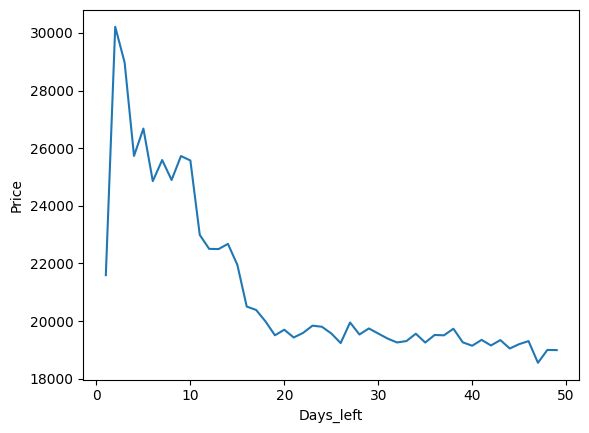

In [26]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(days_left['price'])

plt.xlabel("Days_left") # figure의 x축의 이름을 지정한다.

plt.ylabel("Price") # figure의 y축의 이름을 지정한다.

plt.show()

### 2) 막대 그래프(bar plot)
* 각 항목의 수량을 한눈에 파악하고 싶을 때 사용한다.
* 항공사별 평균 항공권 가격을 비교해보자.

In [27]:
airline = df.groupby('airline').mean(numeric_only=True)
airline

,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


In [29]:
label = airline.index
label

Index(['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara'], dtype='object', name='airline')

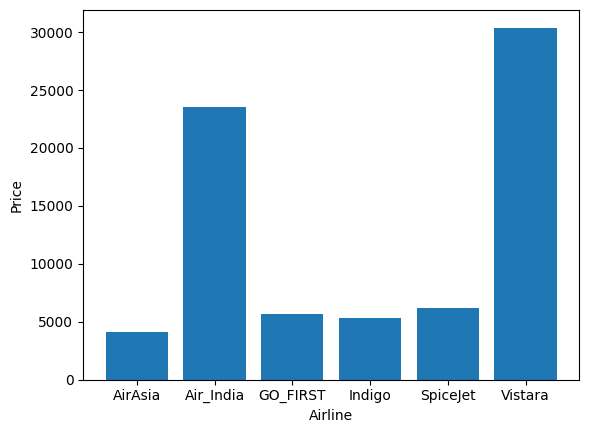

In [32]:
plt.figure()

plt.bar(label, airline['price']) # plot()과 달리 index를 첫번째 인자로 받는다.
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

### 3) 파이 그래프(pie plot)
전체에 대한 각 부분의 비율을 부채꼴 모양으로 나타낸 그래프이다.

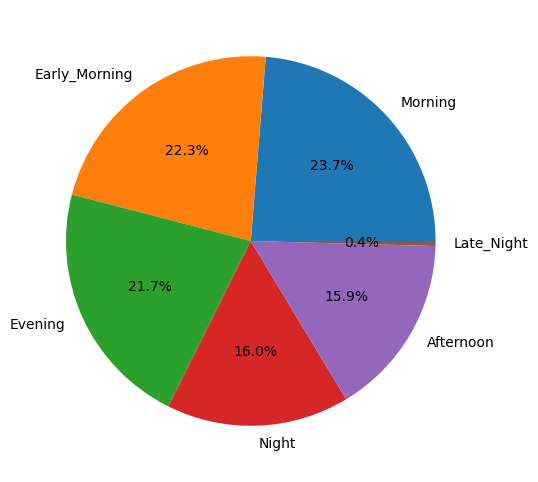

In [35]:
departure_time = df['departure_time'].value_counts() # 두 변수가 아니니까 groupby는 사용하지 않는다.

plt.figure(figsize=(10, 6)) # figsize 파라미터로 figure의 크기를 조절할 수 있다.

# labels 파라미터를 반드시 지정해야 한다.
# autopct 파라미터는 원형 차트 조각에 숫자를 표시할 때 사용한다.
plt.pie(departure_time, labels=departure_time.index, autopct='%.1f%%')

plt.show()

### 4) 히스토그램(histogram)
특정 데이터의 빈도를 구간에 따라 표시한 그래프이다.

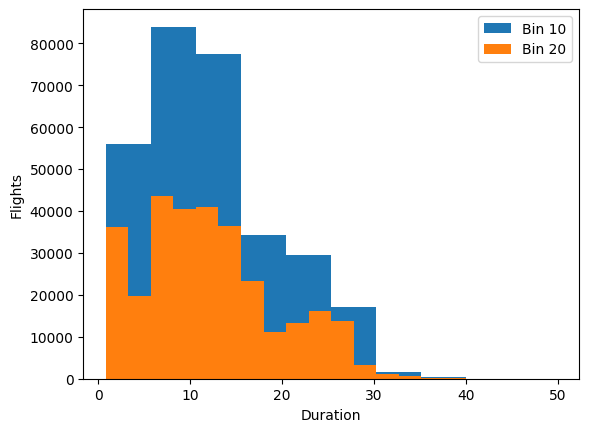

In [38]:
plt.figure()

plt.hist(df['duration'], bins=10) # duration을 10개 구간으로 나누기
plt.hist(df['duration'], bins=20) # duration을 20개 구간으로 나누기

plt.xlabel("Duration")
plt.ylabel("Flights")

plt.legend(("Bin 10", "Bin 20"))
plt.show()

### 5) 상자 그래프(box plot)
* 정해진 최댓값과 최솟값에서 벗어난 값은 이상치(outlier)로 취급한다.
* 비행기 항공권 가격을 상자 그래프로 확인해보자.

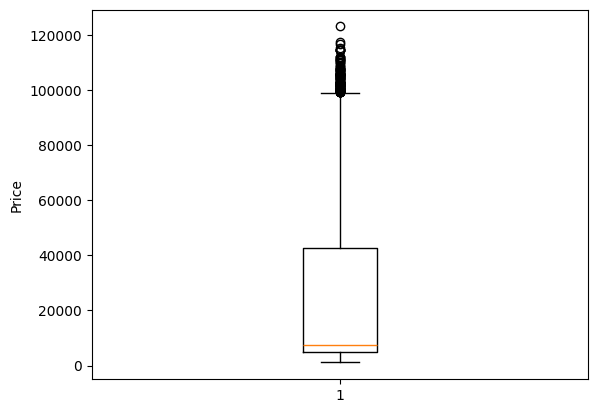

In [40]:
plt.figure()

plt.boxplot(df['price'])
plt.ylabel('Price')
plt.show()

가격 데이터의 범위는 0~120000이지만, 중앙값이 약 10000으로 50%의 비행기는 10000 이하의 가격임을 알 수 있다.

<Axes: title={'center': 'price'}, xlabel='departure_time'>

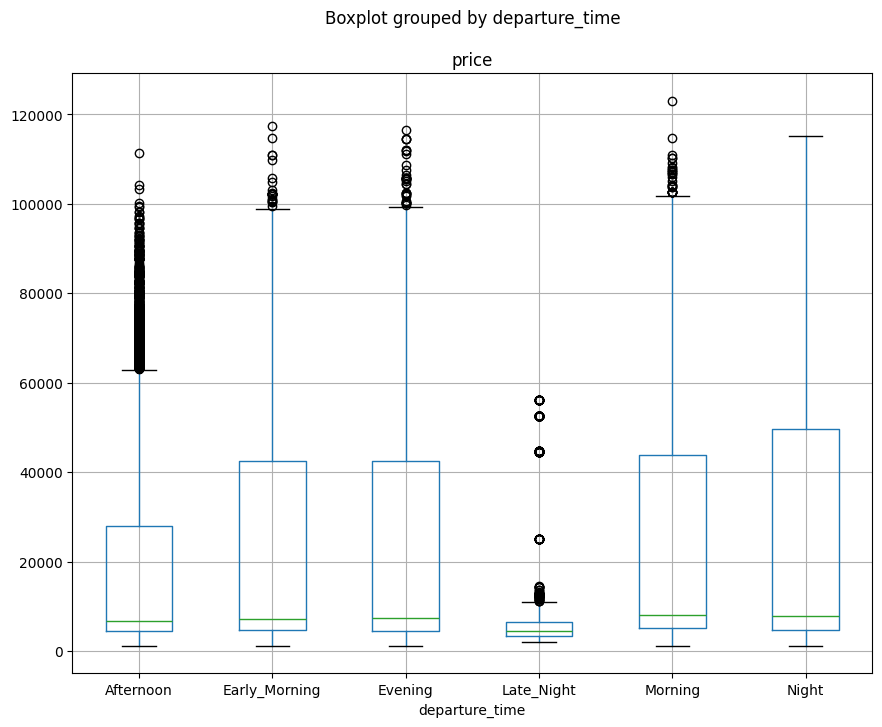

In [42]:
# 데이터프레임에서 boxplot을 사용해 departure_time별로 price에 대한 상자그래프를 그릴 수 있다.
df.boxplot(by='departure_time', column='price', figsize=(10,8))

## 2 다변량 시각화 탐색하기

### 1) 산점도(scatter plot)

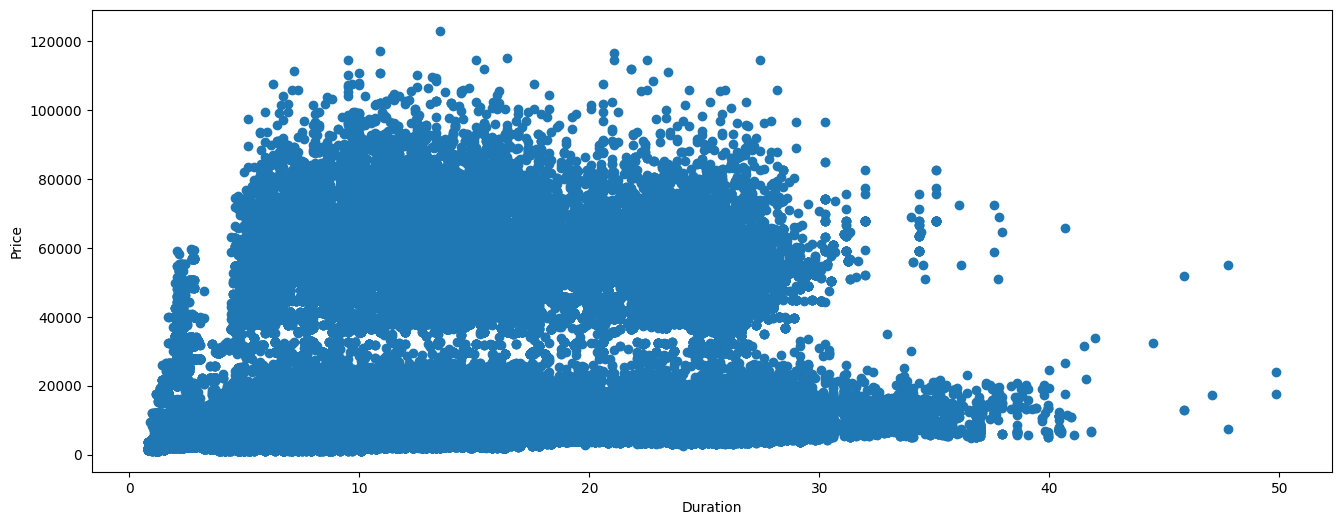

In [45]:
# duration과 price의 산점도
plt.figure(figsize=(16,6))

plt.scatter(df['duration'], df['price'])
plt.xlabel('Duration')
plt.ylabel("Price")

plt.show()

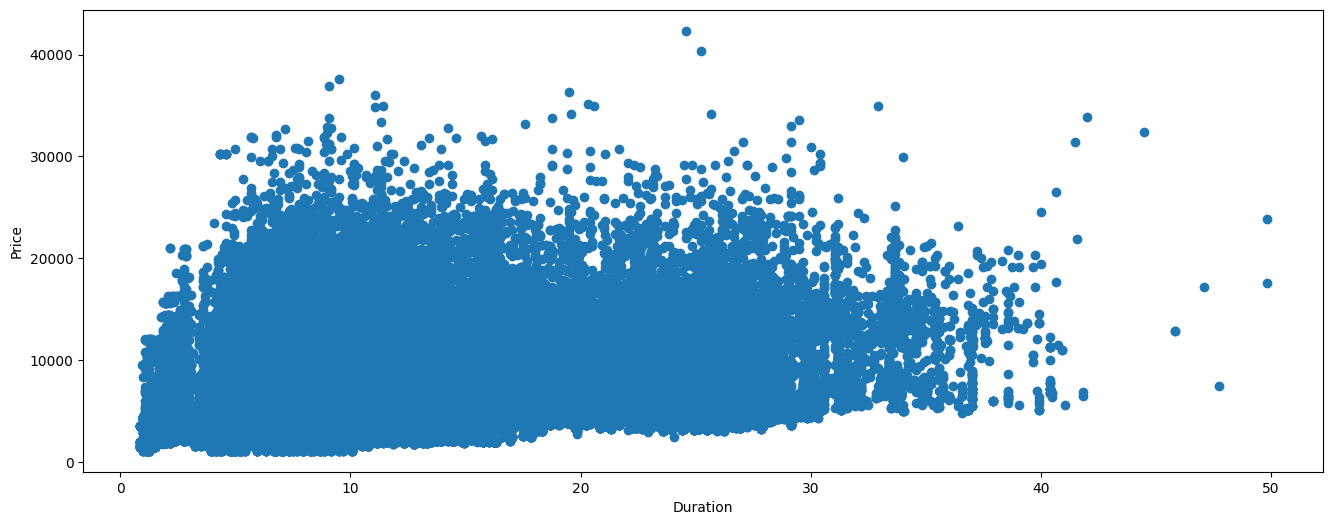

In [46]:
plt.figure(figsize=(16,6))

plt.scatter(df_eco['duration'], df_eco['price'])
plt.xlabel('Duration')
plt.ylabel('Price')

plt.show()

### 2) 히트맵(heatmap)
데이터의 값을 색상으로 표현하는 2차원 그래프이다.

In [50]:
import numpy as np

heat = df_eco.corr(numeric_only=True)

heat

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


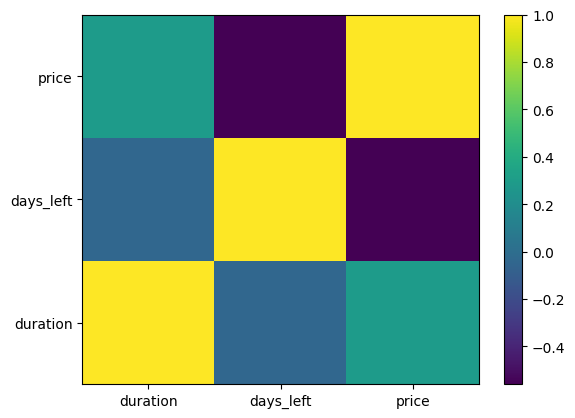

In [51]:
plt.pcolor(heat)

plt.xticks(np.arange(0.5, len(heat.columns), 1), heat.columns)
plt.yticks(np.arange(0.5, len(heat.index), 1), heat.columns)
#np.arange(start, stop, step)

plt.colorbar()
plt.show()

## 3 matplotlib 활용하기

### 1) matplotlib과 연관된 함수
* figure() : 그래프를 그릴 영역을 지정한다.
* show() : figure를 화면에 출력한다.
* title(str) : 그래프 제목을 설정한다.
* xticks() : X축의 눈금의 값, 크기, 기울기 등을 설정한다.
* xlabel(str) : X축의 이름을 설정한다.

## 4 seaborn 라이브러리 활용하기

### 1) 범주형 산점도(categorical plot)
범주형 데이터와 수치형 데이터의 관계를 산점도로 보여주는 그래프이다.

In [53]:
import seaborn as sns

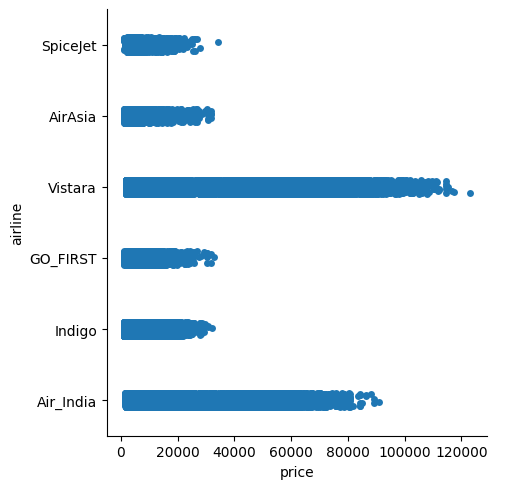

In [56]:
sns.catplot(y='airline', x='price', data=df)

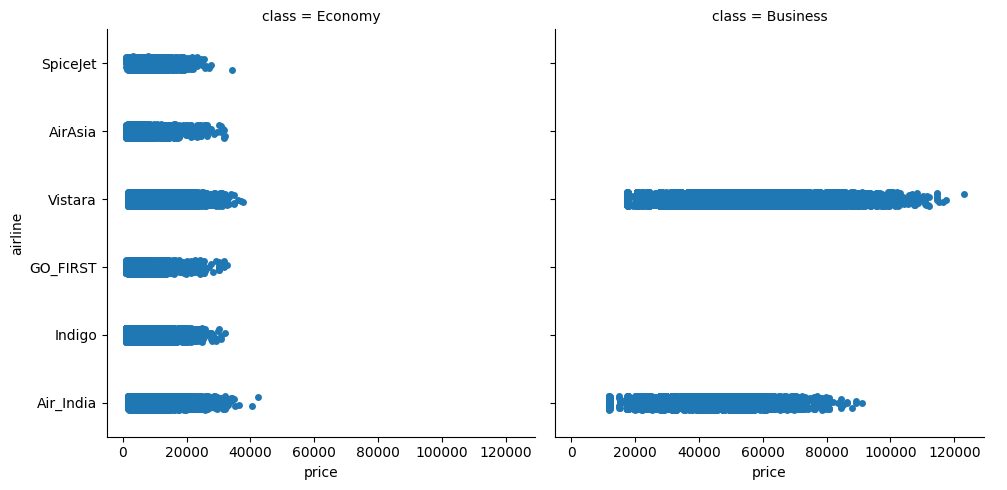

In [58]:
# col 파라미터로 구분하고자 하는 범주형 칼럼을 추가할 수 있다.
sns.catplot(y='airline', x='price', col='class', data=df)

### 2) 선형 회귀 모델 그래프(linear model plot)
* 일반적인 산점도와 함께 회귀선을 그려준다.
* 비행시간과 항공권 가격 간의 선형 관계를 확인해보자.

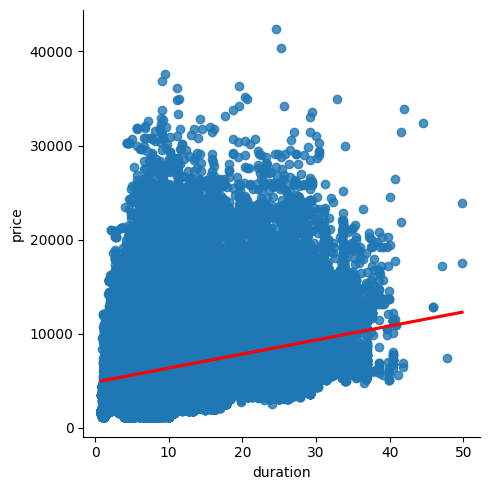

In [61]:
# line_kws(line keyword arguments) : 회귀선의 속성을 설정할 수 있다.
sns.lmplot(x='duration', y='price', data=df_eco, line_kws={'color': 'red'})

### 3) 빈도 그래프(count plot)
범주형 칼럼에 대해 항목별 개수를 막대 그래프로 그려준다.


<Axes: xlabel='airline', ylabel='count'>

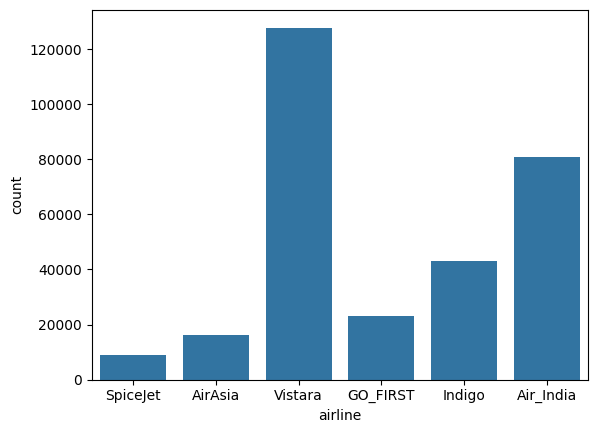

In [62]:
sns.countplot(x='airline', data=df)

<Axes: xlabel='airline', ylabel='count'>

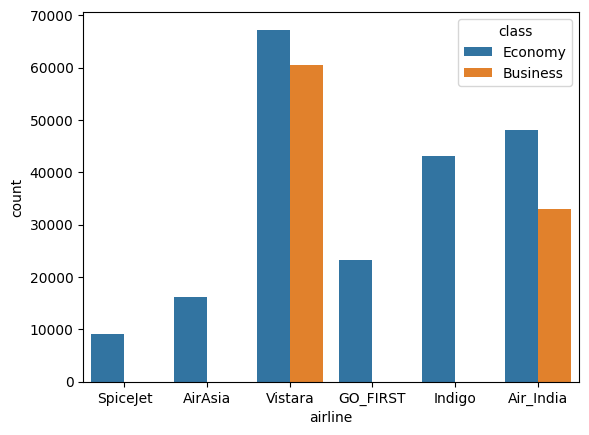

In [63]:
# hue 파라미터로 범례를 하나 추가할 수 있다.
sns.countplot(x='airline', hue='class', data=df)

### 4) 조인트 그래프(joint plot)
* 수치형 데이터에 대해 **산점도와 그래프 가장자리에서 히스토그램**을 동시에 그려주는 그래프이다.
* 산점도로는 알 수 없었던 빈도밀도를 통해 데이터의 분포를 확인하기 쉽다.

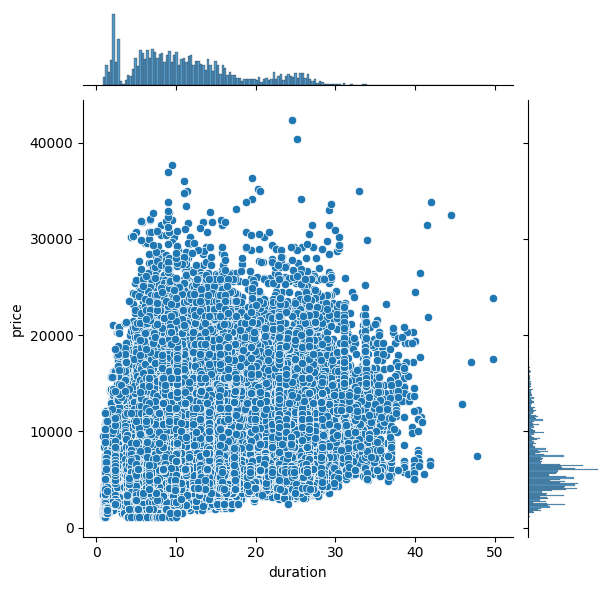

In [67]:
# 비행시간과 항공권 가격의 관계
sns.jointplot(y='price', x='duration', data=df_eco)

### 5) 히트맵(heatmap)
matplotlib에서도 제공하지만, seaborn에서는 x, y 축의 값과 컬러바 등을 자동으로 생성해주기 때문에 seaborn의 히트맵을 주로 사용한다.

In [68]:
df_eco.corr(numeric_only=True) # 상관계수

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


<Axes: >

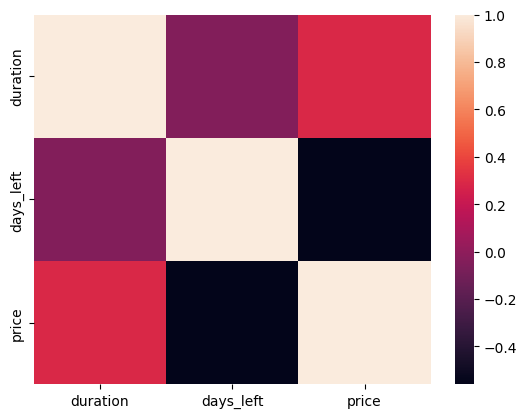

In [66]:
sns.heatmap(df_eco.corr(numeric_only=True))